In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [91]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/미니_프로젝트-데이터_분석/데이터분석프로젝트_VER1_210329_210926.csv", encoding='cp949')
data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaN
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02 0:00:00
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04 0:00:00
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14 0:00:00


| 변수 | 설명 |
| ---- | ---- |
| id | id |
| customer_id | 고객 id |
| course_id | 강의 id |
| type | 결제형태 |
| state | 결제상태 |
| course_title | 강의명 |
| category_title | 대분류 |
| format | 강의분류 |
| completed_at	 | 완료 |
| transaction_amount | 결제금액 |
| coupon_title | 쿠폰명 |
| coupon_discount_amount | 쿠폰할인금액 |
| sale_price | 할인금액 |
| tax_free_amount | 세금공제금액 |
| pg | 페이그룹 |
| method | 결제방법 |
| subcategory_title | 소분류 |
| marketing_start_at | 결제시간 |

In [92]:
data.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.000000,0.201490,0.360501,0.026398,0.069284,0.044891,0.036309
customer_id,0.201490,1.000000,0.023889,0.018670,-0.344772,-0.001245,-0.002124
course_id,0.360501,0.023889,1.000000,0.045096,0.015162,0.042551,0.042170
transaction_amount,0.026398,0.018670,0.045096,1.000000,-0.342960,0.954943,0.947017
coupon_discount_amount,0.069284,-0.344772,0.015162,-0.342960,1.000000,0.251692,0.244997
sale_price,0.044891,-0.001245,0.042551,0.954943,0.251692,1.000000,0.988255
tax_free_amount,0.036309,-0.002124,0.042170,0.947017,0.244997,0.988255,1.000000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      105419 non-null  int64  
 1   customer_id             105416 non-null  float64
 2   course_id               100212 non-null  float64
 3   type                    105419 non-null  object 
 4   state                   105419 non-null  object 
 5   course_title            105403 non-null  object 
 6   category_title          105395 non-null  object 
 7   format                  105403 non-null  object 
 8   completed_at            105419 non-null  object 
 9   transaction_amount      105419 non-null  int64  
 10  coupon_title            31817 non-null   object 
 11  coupon_discount_amount  31817 non-null   float64
 12  sale_price              104291 non-null  float64
 13  tax_free_amount         104291 non-null  float64
 14  pg                  

In [88]:
data['method'].value_counts()

CARD            66380
VBANK            8540
POINT            8084
PROMOTION        4733
TRANS            2732
TRANSFER         1247
ONSITE            599
VOUCHER             5
B2B_CONTRACT        3
Name: method, dtype: int64

In [101]:
data['customer_id'].value_counts()

98685.0     78
50769.0     62
40783.0     59
496508.0    54
427973.0    51
            ..
437600.0     1
551107.0     1
551096.0     1
551091.0     1
610626.0     1
Name: customer_id, Length: 53753, dtype: int64

In [102]:
data['course_id'].value_counts()

203720.0    3257
203525.0    2756
203178.0    2541
204670.0    2132
204871.0    1636
            ... 
205695.0       1
205681.0       1
205688.0       1
205711.0       1
207742.0       1
Name: course_id, Length: 1347, dtype: int64

In [106]:
data['course_id'].unique()

array([201435., 203178., 204246., ..., 207731., 207729., 207742.])

In [103]:
data[data['course_id']==203720]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00
15,970673,478035.0,203720.0,ORDER,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:02,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00
40,970730,445723.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:46,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00
41,970728,445723.0,203720.0,ORDER,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:15:47,91000,NaN,NaN,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00
59,970795,477890.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 16:55:41,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105105,1363366,670044.0,203720.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 11:47:02,179000,NaN,NaN,179000.0,179000.0,INICIS,CARD,프론트엔드 개발,2021-02-02 0:00:00
105154,1363645,262264.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 14:18:52,179000,NaN,NaN,179000.0,179000.0,INICIS,CARD,프론트엔드 개발,2021-02-02 0:00:00
105271,1364333,660535.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 18:50:23,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,프론트엔드 개발,2021-02-02 0:00:00
105293,1364481,669904.0,203720.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-09-24 21:17:31,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,NAVER,NaN,프론트엔드 개발,2021-02-02 0:00:00


In [107]:
data[data['course_id'].isna()]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
6,970614,477910.0,NaN,ORDER,CANCELLED,프로모션 : 2021 내 커리어 지켜 줄 UX/UI 디자인 한끝세트 (3월 프리패스),크리에이티브,올인원,2021-03-28 15:22:36,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
12,970670,429291.0,NaN,ORDER,CANCELLED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 15:27:29,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
13,970672,429291.0,NaN,ORDER,CANCELLED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 15:30:05,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
16,970677,429291.0,NaN,ORDER,CANCELLED,프로모션 : 코딩 LEVEL UP 웹 개발 풀스텍 한끝세트 (3월 프리패스),프로그래밍,올인원,2021-03-28 15:31:29,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
18,970682,478031.0,NaN,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,299000.0,NaN,CARD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,1364532,653384.0,NaN,PAYMENT,CANCELLED,프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스),프로그래밍,올인원,2021-09-24 22:18:01,1800000,NaN,NaN,1800000.0,295200.0,KAKAO,NaN,NaN,NaN
105311,1364534,653384.0,NaN,PAYMENT,CANCELLED,프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스),프로그래밍,올인원,2021-09-24 22:26:56,1800000,NaN,NaN,1800000.0,295200.0,PAYCO,NaN,NaN,NaN
105406,1364929,120686.0,NaN,PAYMENT,COMPLETED,[한정판매] 자연어 A-Z 끝장 패키지(~9월),데이터사이언스,올인원,2021-09-25 12:29:39,481000,NaN,NaN,481000.0,481000.0,INICIS,CARD,NaN,NaN
105408,1364956,545804.0,NaN,PAYMENT,COMPLETED,프로모션 : 디자인 맥북 pro 패스(9월 현물 프리패스),디자인,올인원,2021-09-25 13:25:49,1800000,NaN,NaN,1800000.0,295200.0,INICIS,CARD,NaN,NaN


In [90]:
data['pg'].value_counts()

INICIS    60087
KAKAO     17249
NAVER      8045
PAYCO      4642
CHAI        321
Name: pg, dtype: int64

In [ ]:
data['type'].value_counts()

PAYMENT        61433
ORDER          40159
REFUND          3824
TRANSACTION        3
Name: type, dtype: int64

In [ ]:
data['state'].value_counts()

COMPLETED    62763
CANCELLED    41279
PENDING       1144
DELETED        219
REQUESTED       14
Name: state, dtype: int64

In [ ]:
data.isna().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

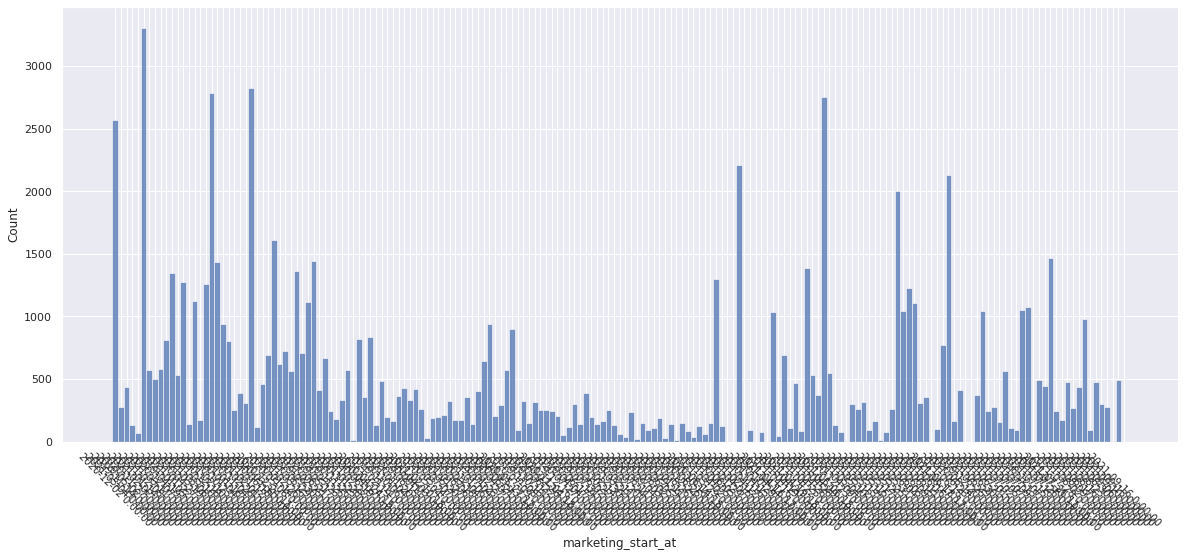

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data= data,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

In [ ]:
combine_course_coupon = data[['course_title','coupon_title']]
combine_course_coupon

,course_title,coupon_title
0,올인원 패키지 : 알고리즘 기술면접 완전 정복,NaN
1,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,NaN
2,시크릿코드 : 프론트엔드 실무 완성편,[10% 할인] 시크릿코드 실무 완성편
3,시크릿코드 : 프론트엔드 실무 완성편,NaN
4,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰
...,...,...
105414,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105415,부동산 디벨로퍼 아카데미 : 인허가,NaN
105416,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,[WELCOME] 온라인 강의 2만원 할인쿠폰
105417,부동산 디벨로퍼 아카데미 : 인허가,NaN


In [ ]:
data[data['method'].isna()]['customer_id'].unique()

array([147114., 167967., 485705., ...,  37866., 623392.,  87331.])

In [ ]:
data2 = data.copy()

In [ ]:
data2['payment_data']= data['pg'] + ' ' + data['method']

In [ ]:
data2['payment_data'].unique()

array([nan, 'INICIS TRANS', 'INICIS CARD', 'INICIS VBANK', 'KAKAO CARD',
       'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD', 'PAYCO POINT',
       'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS', 'NAVER POINT',
       'PAYCO TRANSFER'], dtype=object)

In [ ]:
data2['pg'] = data2['pg'].fillna('PG')
data2['pg'].unique()

array(['PG', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [ ]:
data2['method'] = data2['method'].fillna('')

In [ ]:
data2['payment_data']= data2['pg'] + ' ' + data2['method']

In [ ]:
data2.drop(['pg', 'method'], axis=1, inplace=True)

In [ ]:
data2.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,개발자 커리어,NaN,PG VBANK
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,영상 편집,2020-12-02 0:00:00,PG CARD
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,2021-03-04 0:00:00,PG CARD
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,2021-03-04 0:00:00,PG CARD
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PPT/보고서,2019-11-14 0:00:00,PG CARD


In [ ]:
data2['payment_data'].unique()

array(['PG VBANK', 'PG CARD', 'PG TRANS', 'PG PROMOTION', 'PG TRANSFER',
       'PG ONSITE', 'INICIS TRANS', 'INICIS CARD', 'INICIS VBANK',
       'PG B2B_CONTRACT', 'KAKAO ', 'CHAI ', 'PAYCO ', 'NAVER ',
       'KAKAO CARD', 'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD',
       'PAYCO POINT', 'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS',
       'PG VOUCHER', 'NAVER POINT', 'PAYCO TRANSFER'], dtype=object)

In [96]:
how = {
    'course_title' : np.count_nonzero
}
data2.groupby(['category_title','subcategory_title']).agg(how)

course_title
category_title subcategory_title              
데이터사이언스        데이터분석                      4302
               데이터엔지니어링                    275
               딥러닝/인공지능                   4590
               머신러닝                       1958
디자인            UX/UI                      2775
               디자인툴                       4053
               시각디자인                      1927
               일러스트                       3238
마케팅            SNS마케팅                     1190
               글쓰기/카피라이팅                  3524
               데이터마케팅                     2306
               디지털마케팅                     1754
부동산/금융         금융/투자 실무                   2075
               부동산 개발                     1179
               회계/재무/세무                   1948
업무 생산성         PPT/보고서                    4150
               리더십                         511
               업무자동화                       996
               엑셀/VBA                     3591
               커뮤니케이션                      204
영상/3D          VFX                         523
               게임 그래픽                      385
               모션그래픽                      2033
               영상 편집                      7312
투자/재테크         부동산 투자                      714
               주식 투자                      1787
프로그래밍          DevOps                     2136
               개발자 커리어                    5918
               게임                         1707
               모바일앱                       3724
               백엔드 개발                     6144
               코딩 입문                       782
               프론트엔드 개발                   5879

                              id  customer_id  course_id  transaction_amount  \
id                      1.000000     0.201490   0.360501            0.026398   
customer_id             0.201490     1.000000   0.023889            0.018670   
course_id               0.360501     0.023889   1.000000            0.045096   
transaction_amount      0.026398     0.018670   0.045096            1.000000   
coupon_discount_amount  0.069284    -0.344772   0.015162           -0.342960   
sale_price              0.044891    -0.001245   0.042551            0.954943   
tax_free_amount         0.036309    -0.002124   0.042170            0.947017   

                        coupon_discount_amount  sale_price  tax_free_amount  
id                                    0.069284    0.044891         0.036309  
customer_id                          -0.344772   -0.001245        -0.002124  
course_id                             0.015162    0.042551         0.042170  
transaction_amount                   -0.342960 

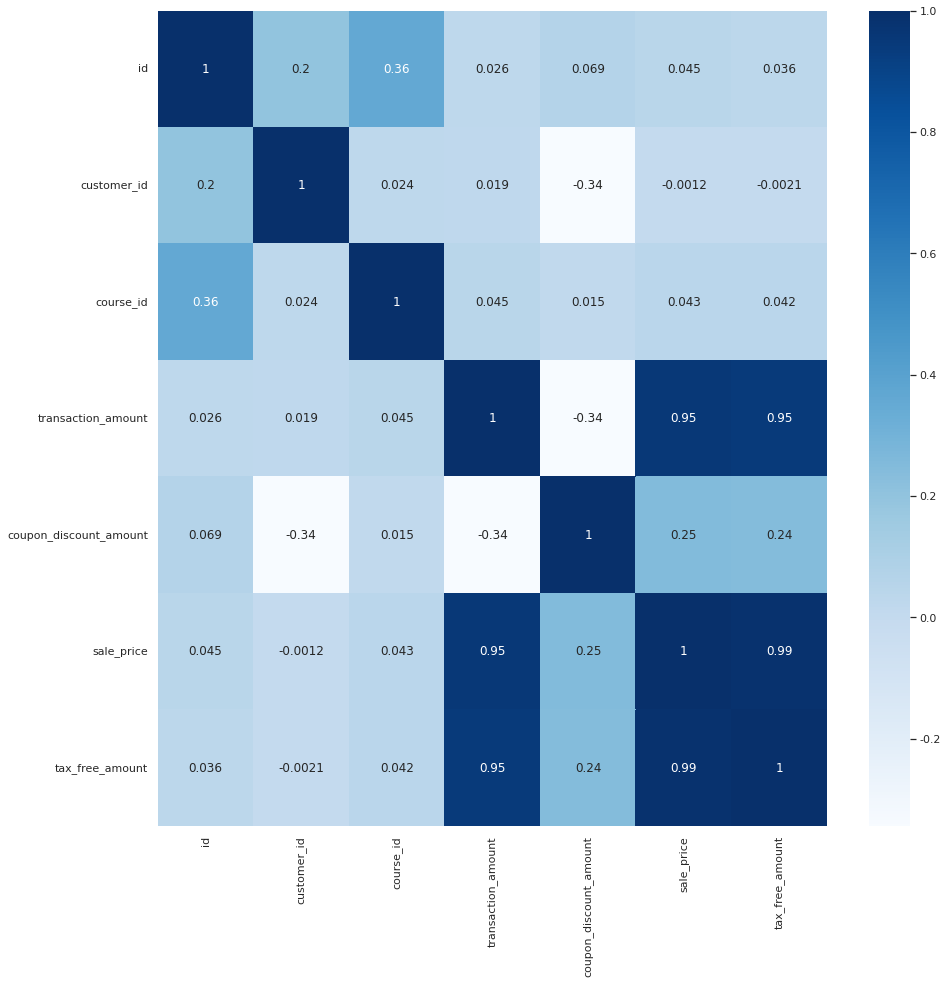

In [97]:
corr = data2.corr()
print(corr)
plt.figure(figsize=(15, 15))
sns.heatmap(data = corr, cmap='Blues', annot=True)
plt.show()

In [100]:
how = {
    'transaction_amount' : np.sum
}
data2.groupby(['type','state']).agg(how)

transaction_amount
type        state                        
ORDER       CANCELLED          4841461868
            COMPLETED           932961850
PAYMENT     CANCELLED          1416919450
            COMPLETED          8642456412
            DELETED              57635600
            PENDING             179941980
            REQUESTED             2073700
REFUND      COMPLETED          -629922955
            DELETED              -1603000
TRANSACTION COMPLETED                   0

In [110]:
how = {
    'transaction_amount' : np.sum,
}
data2.groupby(['category_title','state']).agg(how)

transaction_amount
category_title state                        
관리             CANCELLED              150000
               COMPLETED              150000
교육             CANCELLED            96107045
               COMPLETED          1160775545
               DELETED              19852500
데이터 사이언스       CANCELLED             1556000
               COMPLETED             1550000
데이터사이언스        CANCELLED          1107113125
               COMPLETED          1660328649
               DELETED               4040700
               PENDING              26399750
               REQUESTED              456000
디자인            CANCELLED           667121410
               COMPLETED           777925268
               DELETED               2997200
               PENDING              24017950
마케팅            CANCELLED           597333620
               COMPLETED           868305624
               DELETED               3617800
               PENDING              24529750
               REQUESTED              471200
부동산/금융         CANCELLED           397011775
               COMPLETED           538303534
               DELETED               1398000
               PENDING               9875800
               REQUESTED              101000
비즈니스           CANCELLED             6124355
               COMPLETED             5389865
업무 생산성         CANCELLED           524203465
               COMPLETED           663920925
               DELETED               2785900
               PENDING              19338065
               REQUESTED              206500
영상/3D          CANCELLED           463843275
               COMPLETED           616108205
               DELETED               3218600
               PENDING              14452000
               REQUESTED              269500
일러스트           CANCELLED              208000
지식콘텐츠          CANCELLED             4710000
               COMPLETED             7360000
               PENDING                707000
크리에이티브         CANCELLED           472480400
               COMPLETED           341440827
               DELETED               4037000
               PENDING              11986300
               REQUESTED              199000
투자/재테크         CANCELLED           154778425
               COMPLETED           316888820
               DELETED               1177000
               PENDING               6770500
파이낸스           CANCELLED             1980000
               COMPLETED             5100000
프로그래밍          CANCELLED          1757270423
               COMPLETED          1968677045
               DELETED               7736400
               PENDING              41864865
               REQUESTED              370500

In [112]:
how = {
    'customer_id' : np.count_nonzero
}

data2.groupby(['format']).agg(how)

,customer_id
format,
B2B,808
B2B 온라인,1086
B2G,592
MBA,56
RED,6253
관리,2
스쿨,1036
스쿨 온라인,1057
아카이브,72


In [115]:
how = {
    'customer_id' : np.count_nonzero,
    'transaction_amount' : np.sum,
}

data2.groupby(['format','category_title']).agg(how)

customer_id  transaction_amount
format  category_title                                 
B2B     교육                        6            24347500
        데이터사이언스                  32           578182780
        마케팅                       5           144068900
        업무 생산성                    5            22025500
        크리에이티브                   10           154753500
        프로그래밍                   750            57007010
B2B 온라인 교육                     1025          1252387590
        데이터사이언스                  15            65907774
        마케팅                       6             2760000
        부동산/금융                    5             2177500
        비즈니스                      2             2128000
        업무 생산성                    1              480000
        크리에이티브                    9             3660000
        파이낸스                      1              480000
        프로그래밍                    22            17925000
B2G     마케팅                       1            20000000
        프로그래밍                   591            15620300
MBA     지식콘텐츠                    56            12777000
RED     데이터사이언스                 602           135206000
        마케팅                    3012           377560908
        업무 생산성                  212            36070000
        영상/3D                   422            69811700
        프로그래밍                  2005           302442355
관리      관리                        2              300000
스쿨      데이터사이언스                  79            14608693
        크리에이티브                    5            -2890833
        프로그래밍                   952           -13003206
스쿨 온라인  프로그래밍                  1057            93500052
아카이브    크리에이티브                   72             4505400
온라인 완주반 데이터 사이언스                  9             3106000
        데이터사이언스                 826           302769220
        마케팅                     491           199982769
        비즈니스                      3              942000
        업무 생산성                  430           100218000
        크리에이티브                  783           238463418
        프로그래밍                  1275           433985953
올인원     데이터사이언스               12452          1656083757
        디자인                   12009          1472061828
        마케팅                    6330           749137417
        부동산/금융                 5500           940272109
        비즈니스                     29             8250000
        업무 생산성                 9705           992031994
        영상/3D                  9838          1028079880
        크리에이티브                 1325           428840042
        투자/재테크                 2501           479614745
        파이낸스                     24             6600000
        프로그래밍                 27682          2860931769
이벤트     데이터사이언스                  33             1694000
        마케팅                      12              748000
        부동산/금융                    9              539000
        크리에이티브                   45             2633000
        프로그래밍                    94             4885000
캠프      데이터사이언스                  37            43886000
        부동산/금융                    9             3701500
        프로그래밍                     2             2625000
콜로소     일러스트                      1              208000
        크리에이티브                    1              179000
하루10분컷  비즈니스                      8              194220
        업무 생산성                 2970            59629361

In [124]:
data2[data2['state']=='COMPLETED']

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,2021-03-04 0:00:00,PG CARD
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,PPT/보고서,2019-11-14 0:00:00,PG CARD
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,116000.0,영상 편집,2020-12-02 0:00:00,PG CARD
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,263000.0,NaN,2020-11-27 0:00:00,PG CARD
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,111000.0,프론트엔드 개발,2021-02-02 0:00:00,PG CARD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,디자인툴,2021-04-23 0:00:00,INICIS CARD
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,영상 편집,2020-12-02 0:00:00,KAKAO CARD
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,백엔드 개발,2021-05-31 0:00:00,INICIS CARD
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,영상 편집,2021-06-15 0:00:00,INICIS VBANK


In [125]:
how = {
    'customer_id' : np.count_nonzero
}
data3 = data2.copy()
data3= data2.drop(data2.loc[data2['state'] != 'COMPLETED'].index)
data3.groupby(['type', 'state','category_title','subcategory_title']).agg(how)

customer_id
type   state     category_title subcategory_title             
ORDER  COMPLETED 데이터사이언스        데이터분석                      326
                                데이터엔지니어링                     8
                                딥러닝/인공지능                   261
                                머신러닝                       155
                 디자인            UX/UI                      160
...                                                        ...
REFUND COMPLETED 프로그래밍          게임                          51
                                모바일앱                       165
                                백엔드 개발                     261
                                코딩 입문                       30
                                프론트엔드 개발                   233

[99 rows x 1 columns]